In [85]:
import pandas as pd
import os
from os import path
# Setting where our data is sitting
data_folder = path.join(
    path.abspath('..'),  # '..' means the directory above this one
    'data')
#data_folder

In [28]:
raw_postcodes = \
    pd.read_csv(path.join(data_folder, 'australian_postcodes.csv')) \
      .dropna(how='any')

# We have to remove duplicate records (there's one for each suburb) so we aggregate them up
postcodes = pd.DataFrame.from_records([
        (postcode, df.long.mean(), df.lat.mean(), ', '.join(df.locality))
        for postcode, df in raw_postcodes.groupby('postcode')
    ],
    columns=('postcode', 'longitude', 'latitude', 'locality'),
    index='postcode'
)
#postcodes.head()


In [86]:
fault_data = \
    pd.read_csv(path.join(data_folder, 'faults.csv')) \
      .dropna(how='any')

# rename columns
new_names = {
    'City': 'suburb',
    'Notif.Date': 'date',
    'PriorityType': 'type',
    'Pipe Material': 'material',
    'Pipe Size': 'size',
    'Notification': 'notif',
}
faults_data.rename(columns=new_names, inplace=True)
#faults_data.head()

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
#fault_data = fault_data.join(postcodes, how='inner')
fault_data = pd.merge(faults_data, postcodes, left_on='suburb', right_on='locality', how='inner')
#fault_data = faults_data.join(postcodes.set_index('locality'), on='suburb', how='left')
#fault_data=pd.merge(faults_data, postcodes, how='left', on=['suburb', 'locality'])
fault_data

,notif,Notif.date,Notification Year,Code group,Damage Code,Code group.1,Cause code,Code group.2,ObjectPartCode,Functional Loc.,...,User status,System status,Cause code text,suburb,Malfunct. start,Malfunct.end,Location,longitude,latitude,locality
0,301263990,23/02/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00935772,...,INI OBLD,ATCO NOCO NOPT ORAS,3rd Party Intervention,ALBANY,23/02/2013,23/02/2013,AL,0.000000,0.000000,ALBANY
1,301255216,30/01/2013,2013,MNDAMAGE,DAMG,MNCAUSE,ATCO,MNOBJECT,BOCP,00935777,...,INI,ATCO NOCO NOPT ORAS,ATCO Operator,ALBANY,30/01/2013,30/01/2013,AL,0.000000,0.000000,ALBANY
2,301360363,01/11/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00954980,...,INI OBLD,ATCO NOCO NOPT ORAS,3rd Party Intervention,ALBANY,01/11/2013,01/11/2013,AL,0.000000,0.000000,ALBANY
3,301241643,11/12/2012,2012,MNWORK,CHCK,MNREQUST,ATCO,MNOBJECT,PIPE,00455690,...,INI,ATCO NOCO NOPT ORAS,ATCO Request,ALBANY,11/12/2012,04/02/2013,AL,0.000000,0.000000,ALBANY
4,301233254,17/11/2012,2012,MNWORK,CHCK,MNCAUSE,3PTY,MNOBJECT,PIPE,00469373,...,INI,ATCO NOCO NOPT ORAS,3rd Party Intervention,ALBANY,13/11/2012,14/11/2012,AL,0.000000,0.000000,ALBANY
5,301441158,11/06/2014,2014,MNWORK,CHCK,MNREQUST,ATCO,MNOBJECT,PIPE,00472445,...,INI,ATCO NOCO NOPT ORAS,ATCO Request,ALBANY,11/06/2014,18/08/2014,AL,0.000000,0.000000,ALBANY
6,301254504,26/01/2013,2013,MNWORK,CHCK,MNCAUSE,3PTY,MNOBJECT,PIPE,00474711,...,INI,ATCO NOCO ORAS,3rd Party Intervention,ALBANY,20/01/2013,21/01/2013,AL,0.000000,0.000000,ALBANY
7,301408013,25/03/2014,2014,MNWORK,CHCK,MNCAUSE,3PTY,MNOBJECT,PIPE,00474711,...,INI,ATCO NOCO ORAS,3rd Party Intervention,ALBANY,19/03/2014,20/03/2014,AL,0.000000,0.000000,ALBANY
8,301279677,04/04/2013,2013,MNWORK,CHCK,MNREQUST,ATCO,MNOBJECT,PIPE,00474711,...,INI,ATCO NOCO NOPT ORAS,ATCO Request,ALBANY,04/04/2013,18/04/2013,AL,0.000000,0.000000,ALBANY
9,301244609,19/12/2012,2012,MNWORK,CHCK,MNREQUST,ATCO,MNOBJECT,PIPE,00494883,...,INI,ATCO NOCO NOPT ORAS,ATCO Request,ALBANY,19/12/2012,07/05/2013,AL,0.000000,0.000000,ALBANY


In [80]:
#fault_data=fault_data.fillna(0)

In [48]:
fault_data

,Notification,Notif.date,Notification Year,Code group,Damage Code,Code group.1,Cause code,Code group.2,ObjectPartCode,Functional Loc.,...,Description.1,User status,System status,Cause code text,City,Malfunct. start,Malfunct.end,Location,longitude,latitude
8,301297459,23/05/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,450977,...,BROKEN MAIN,INI OBLD,ATCO NOCO ORAS,3rd Party Intervention,SPENCER PARK,23/05/2013,23/05/2013,AL,117.863286,-34.905438
9,301453151,10/07/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,450977,...,BROKEN MAIN,INI,ATCO NOCO NOPT ORAS,3rd Party Intervention,SPENCER PARK,10/07/2014,10/07/2014,AL,117.863286,-34.905438
10,301506040,7/11/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,453028,...,M6WA324050 BROKEN MAIN,INI OBLD,ATCO NOCO NOPT ORAS,3rd Party Intervention,MOUNT CLARENCE,7/11/2014,7/11/2014,AL,117.863286,-34.905438
11,301335630,28/08/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,479319,...,BROKEN MAIN,REIS,ATCO NOCO NOPT ORAS,3rd Party Intervention,YAKAMIA,28/08/2013,28/08/2013,AL,117.863286,-34.905438
12,301267394,28/02/2013,2013,MNDAMAGE,BROK,MNCAUSE,ATCO,MNOBJECT,PIPE,504762,...,PIP BKN MAIN - PAT DURING (ATCOGAS),REIS,ATCO NOCO NOPT ORAS,ATCO Operator,MIDDLETON BEACH,28/02/2013,28/02/2013,AL,117.863286,-34.905438
13,301267796,1/03/2013,2013,MNDAMAGE,BROK,MNCAUSE,ATCO,MNOBJECT,PIPE,504762,...,PIP BROKEN MAIN,INI,ATCO NOCO NOPT ORAS,ATCO Operator,MIDDLETON BEACH,1/03/2013,1/03/2013,AL,117.863286,-34.905438
14,300927685,23/04/2010,2010,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,520226,...,BROKEN MAIN - PETER 0437208804,INI OBLD NORD,ATCO NOCO NOPT,3rd Party Intervention,SPENCER PARK,23/04/2010,23/04/2010,AL,117.863286,-34.905438
15,301422743,30/04/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,590344,...,BROKEN MAIN - 63 PE,INI OBLD,ATCO NOCO NOPT ORAS,3rd Party Intervention,MOUNT CLARENCE,30/04/2014,30/04/2014,AL,117.863286,-34.905438
16,301443106,17/06/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,815528,...,BROKEN MAIN,INI OBLD,ATCO NOCO NOPT ORAS,3rd Party Intervention,YAKAMIA,17/06/2014,17/06/2014,AL,117.863286,-34.905438
17,301296680,21/05/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,842107,...,BROKEN MAIN,INI,ATCO NOCO NOPT ORAS,3rd Party Intervention,MIRA MAR,21/05/2013,21/05/2013,AL,117.863286,-34.905438


In [87]:
import numpy as np
import seaborn as sns
sns.set()

In [88]:
# Splits from longitude
split_points = [
    ('longitude', 110, [False, True])
]

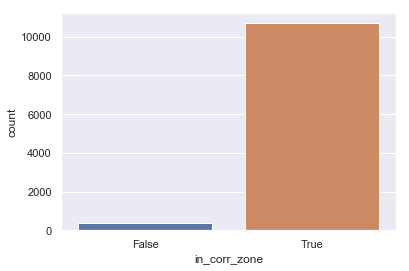

In [89]:
# In elevated corossion zone if all constraints are true
fault_data['in_corr_zone'] = np.vstack([
    pd.cut(fault_data[longitude], bins=[0, split, 200], labels=in_corr_zone)
    for longitude, split, in_corr_zone in split_points
]).sum(axis=0) == 1
sns.countplot('in_corr_zone', data=fault_data)

In [90]:
fault_data['in_corr_zone']

3         True
7        False
8         True
9         True
10        True
12        True
13        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
32        True
34        True
35        True
36        True
39        True
40        True
43        True
45        True
         ...  
20334     True
20338     True
20339     True
20340     True
20341     True
20343     True
20344     True
20345     True
20346     True
20352     True
20353     True
20357     True
20359     True
20369     True
20370     True
20372     True
20375     True
20378     True
20380     True
20384     True
20385     True
20387     True
20392     True
20399     True
20411     True
20412     True
20417     True
20419     True
20420     True
20422    False
Name: in_corr_zone, Length: 11080, dtype: bool

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\numpy\core\fromnumeric.py:83

TypeError: 990391.0 is not a string

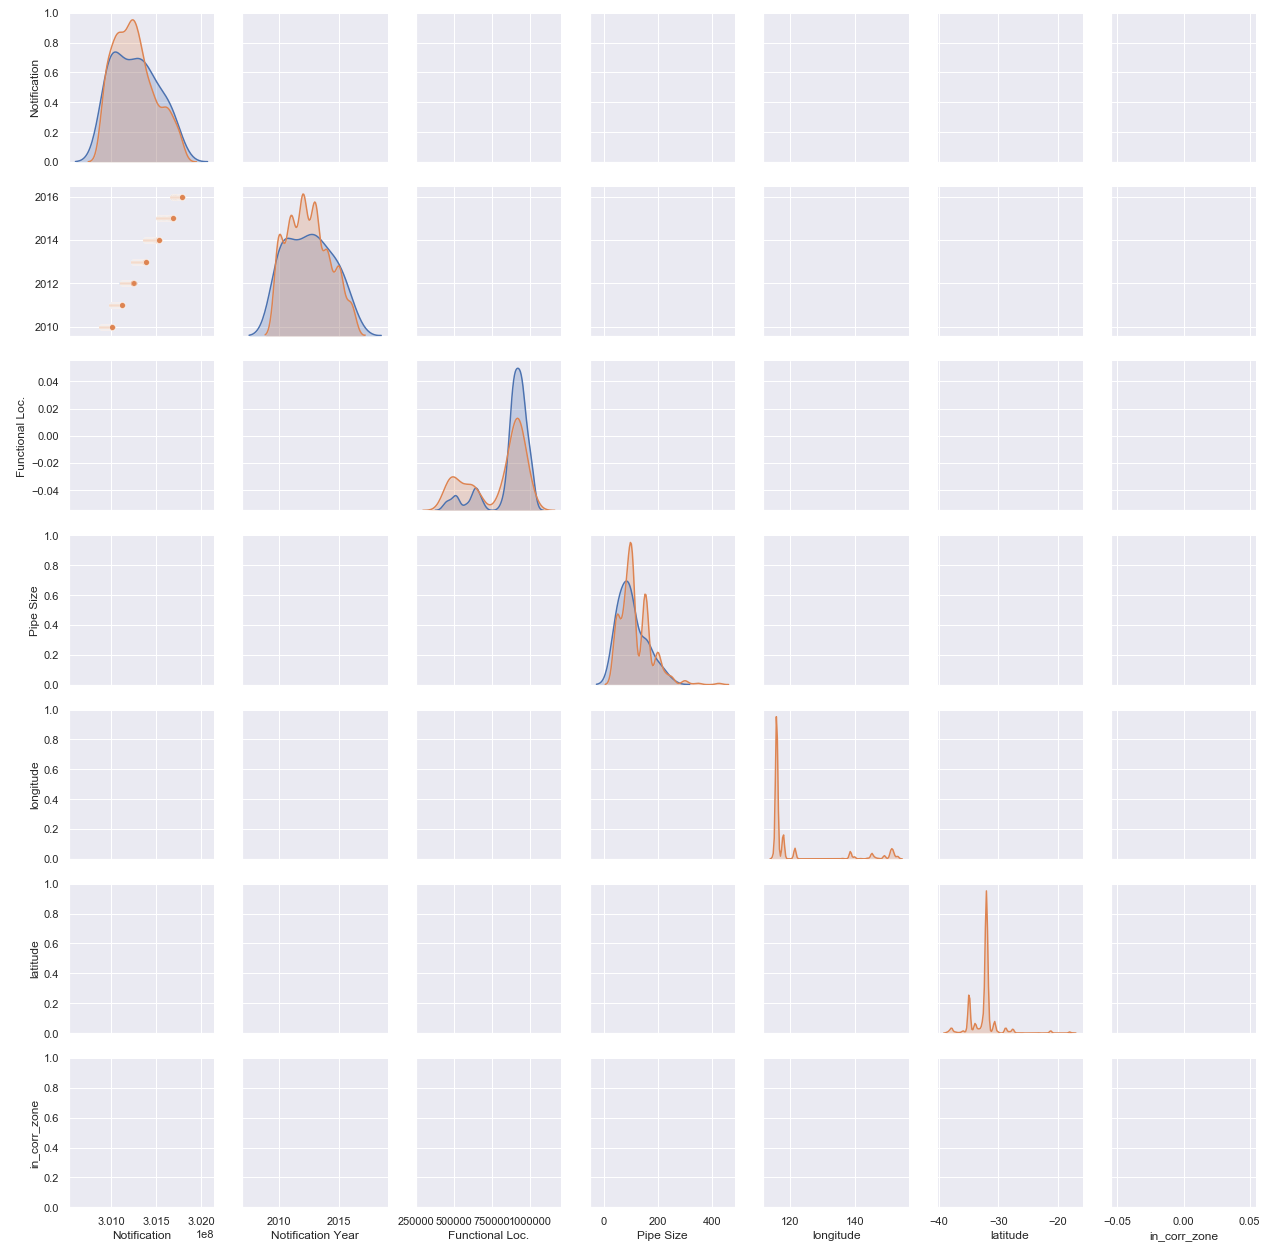

In [91]:
sns.pairplot(fault_data.iloc[::5], hue='in_corr_zone', plot_kws={'alpha': 0.5})

ValueError: Could not interpret input 'size'

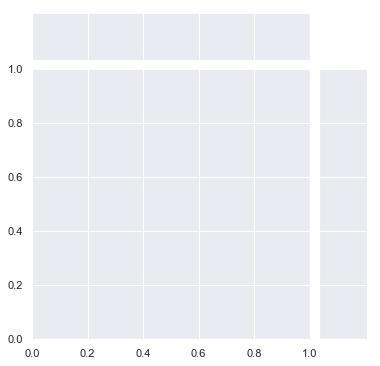

In [78]:
sns.jointplot('longitude', 'size', fault_data, joint_kws={'alpha': 0.4, 'marker': '.'})

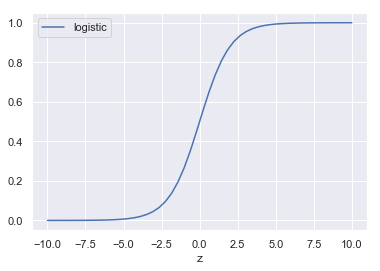

In [92]:
def logistic(z):    
    return 1 / (1 + np.exp(-z))

zs = np.linspace(-10, 10)
logistic_data = pd.DataFrame( 
    {'z': zs, 'logistic': logistic(zs)}
)
logistic_data.plot('z', 'logistic')

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


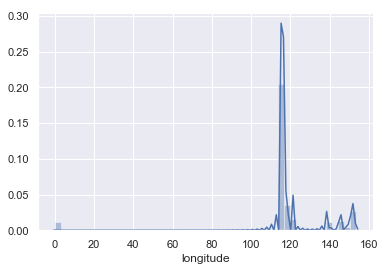

In [93]:
sns.distplot(fault_data['longitude'])

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


OverflowError: cannot convert float infinity to integer

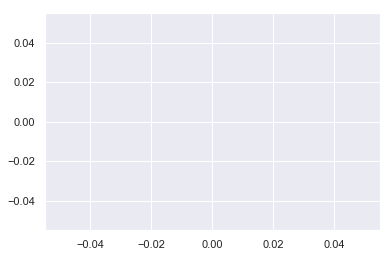

In [98]:
sns.distplot(np.log(fault_data['longitude']))

In [94]:
from sklearn import preprocessing, pipeline, linear_model

# Make up our pipeline where we transform the longitude first to make it more gaussian!
regressor = pipeline.Pipeline([
    ('transform', preprocessing.FunctionTransformer(np.log, validate=True)),
    ('model', linear_model.LogisticRegression())
])

In [95]:
X = fault_data[['longitude']]
y = fault_data['in_corr_zone']

In [96]:
X

,longitude
3,115.896508
7,0.000000
8,115.756405
9,117.863286
10,117.863286
12,115.890779
13,150.979458
15,115.728286
16,115.798722
17,115.845329


In [97]:
regressor.fit(X, y)

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\sklearn\preprocessing\_function_transformer.py:161: RuntimeWarning: divide by zero encountered in log
  **(kw_args if kw_args else {}))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
predict_df = pd.DataFrame(
    {'test_longitude_values': [110, 120, 130, 140, 150]} # Are these values in elevated corrosion zone or not?
)  
regressor.predict(predict_df)

In [ ]:
model = regressor.named_steps.model
model.intercept_, model.coef_

In [ ]:
def logistic(regressor, X):
    """
    Plot our logistic model given input values x
    
    We're doing this so that we can see the output of the logistic function - normally
    you'd just do `regressor.predict(x)` to get actual 1, 0 labels for your data.
    
    Parameters:
        regressor - a fitted logistic regression pipeline
        x - the values to evaulate the function at
    """
    # We can pull the model and transforms from our pipeline
    model = regressor.named_steps.model
    tf = regressor.named_steps.transform
    
    # Next we replay the steps in the pipeline to make a prediction
    z = model.intercept_ + model.coef_[0][0] * tf.transform(X)
    return 1 / (1 + np.exp(-z)).ravel()

In [ ]:
logistic(regressor, predict_df)

In [ ]:
f, ax = plt.subplots(1, 1)

# Some longitude values to predict from
longs = pd.DataFrame(
    {'test_longitude_values': np.linspace(0.1, 3)}
)

# An offset to stop everything plotting on top of everything else
offset = 0.02

# shows predictions given contents
predictions = regressor.predict(longs)
ax.plot(longs, predictions + offset, '.', alpha=0.7, label='predicted (+ offset)')  

# shows measured values plus jitter
jitter = np.random.normal(scale=0.01, size=len(fault_data))
ax.plot(fault_data['longitude'], fault_data['is_corr'] + jitter - offset, '.', alpha=0.1, label='measured (+ jitter - offset)')

# shows logistic function fitted from regressor
ax.plot(longs, logistic(regressor, longs), '--', label='fitted logistic function')

# Generate the logistic curve showing the location of 
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.set_title('Logistic regression with scikit-learn')
f.tight_layout()
#plot below: where y axis = 0.5 move across to logistic function. this shows hte cut off between is_ore and not is_ore.